In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation

In [186]:
x = stats.norm(5.0,1.0).rvs(200) # (mean, std. deviation, N)
m = 3
b = 60
y = m * (x + stats.norm(0,0.2).rvs(200)) + b 

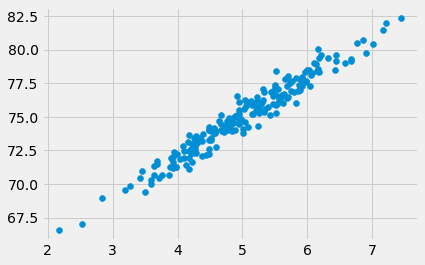

In [187]:
plt.scatter(x,y)

## Regression plot

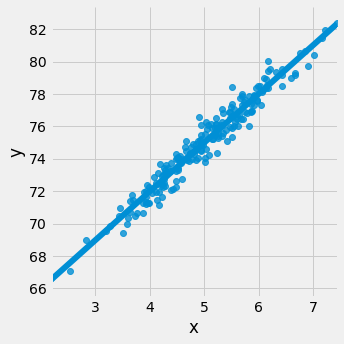

In [188]:
sns.lmplot('x','y', data=pd.DataFrame({'x':x, 'y':y}))

## Pearson correlation

In [189]:
r, p = stats.pearsonr(x,y)
print(r, p)

0.9755466356227604 3.0357470110008925e-132


## Regression line

In [190]:
m = r * (np.std(y)/np.std(x))

In [191]:
b = np.mean(y) - m * np.mean(x)

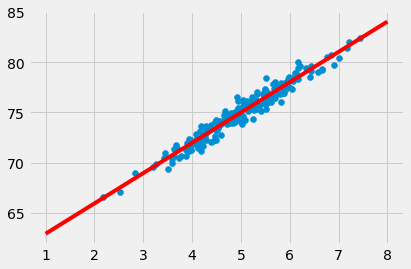

In [192]:
x_1 = np.linspace(1,8,100)
y_1 = b + m * x_1

plt.scatter(x,y)
plt.plot(x_1, y_1, c='r')

# Linear regression using scipy

In [193]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r_value)
print('p_val: ', p_value)
print('std_err: ', std_err)

Slope:  3.010365046986655
Intercept:  59.944458491341756
r:  0.9755466356227607
p_val:  3.035747010998475e-132
std_err:  0.04820049351870525


In [194]:
y_2 = intercept + slope * x_1

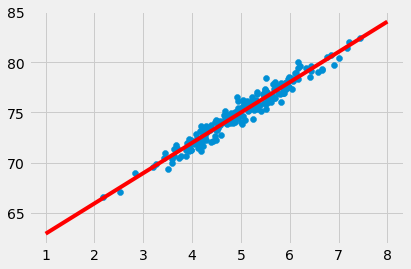

In [195]:
plt.scatter(x,y)
plt.plot(x_1, y_2, c='red')

## Nonlinear regression

In [200]:
x = np.random.uniform(0., 10., 100)
y = np.polyval([1, 2, -3], x) + np.random.normal(0., 10., 100)

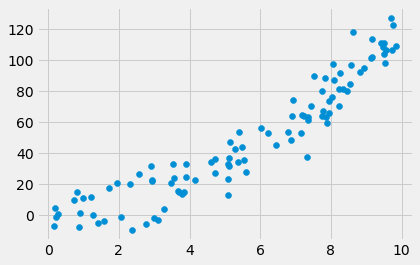

In [201]:
plt.scatter(x,y)

In [207]:
def curva(x, a, b, c):
    return a + b * x + c * x**2

In [208]:
from scipy.optimize import curve_fit
params, params_covariance = curve_fit(curva, x, y)

In [209]:
params

array([2.57294135, 0.23121746, 1.15674351])

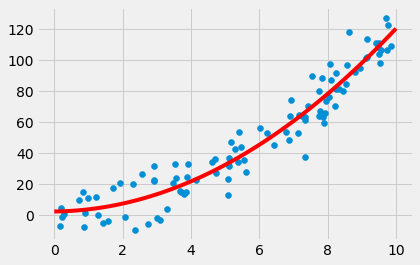

In [211]:
x_1 = np.linspace(0,10,100)
plt.plot(x_1, curva(x_1, params[0], params[1], params[2]), c='red')
plt.scatter(x,y)

# Multiple linear regression

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [217]:
import sklearn

In [219]:
#2 Importing the dataset: 
dataset = pd.read_csv("data/50_Startups.csv")

In [220]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [248]:
dataset.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

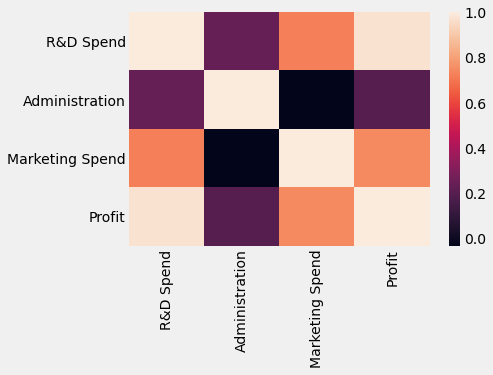

In [221]:
sns.heatmap(dataset.corr())

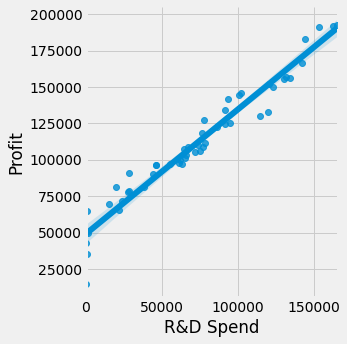

In [222]:
sns.lmplot(x='R&D Spend', y='Profit', data=dataset)

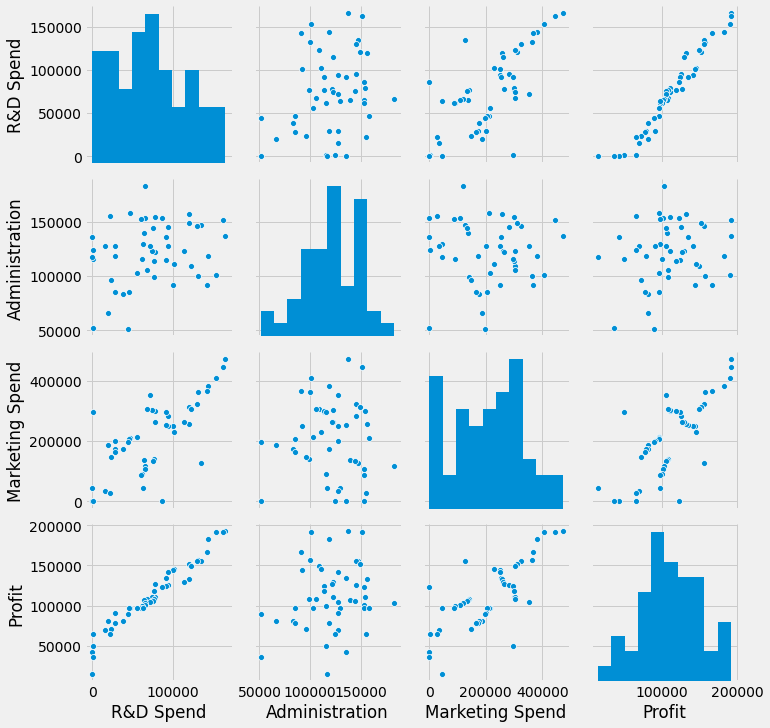

In [223]:
sns.pairplot(dataset)

In [224]:
x = dataset[['R&D Spend']]
y = dataset['Profit']

In [225]:
linear_regress = LinearRegression()

In [226]:
linear_regress.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [228]:
print(linear_regress.intercept_, linear_regress.coef_)

49032.89914125215 [0.85429137]


In [242]:
stats.linregress(list(x['R&D Spend']), list(y))

LinregressResult(slope=0.8542913709388089, intercept=49032.899141252135, rvalue=0.9729004656594832, pvalue=3.500322243690248e-32, stderr=0.029305591498200445)

In [243]:
# predict with the data
y_pred = linear_regress.predict(x)


In [244]:
stats.pearsonr(y,y_pred)

(0.9729004656594833, 3.5003222436899204e-32)

In [245]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(df.head(10))

      Actual      Predicted
0  192261.83  190289.293893
1  191792.06  187938.711186
2  191050.39  180116.657078
3  182901.99  172369.003206
4  166187.94  170433.973450
5  156991.12  161694.196837
6  156122.51  164033.725014
7  155752.60  160345.467250
8  152211.77  152011.333808
9  149759.96  154396.822861


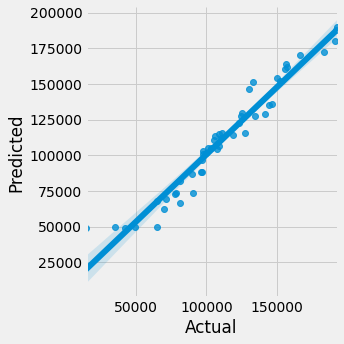

In [246]:
sns.lmplot('Actual','Predicted', data = df)

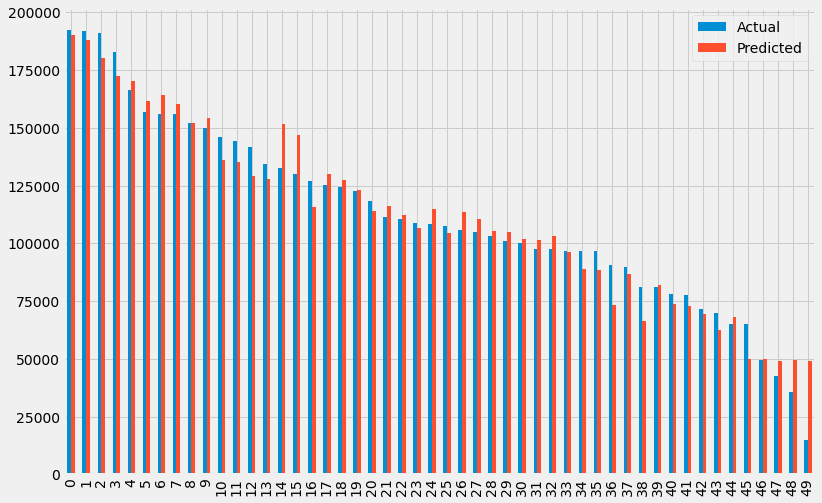

In [247]:
df.plot(kind='bar',figsize=(12,8))

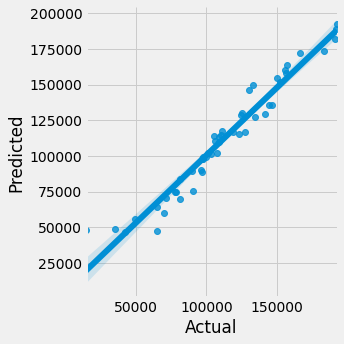

In [299]:
x = dataset[['R&D Spend','Administration','Marketing Spend']]
y = dataset['Profit']

linear_regress.fit(x,y)
y_pred = linear_regress.predict(x)

sns.lmplot('Actual','Predicted', data =  pd.DataFrame({'Actual': y, 'Predicted': y_pred}))

In [253]:
stats.pearsonr(y,y_pred)

(0.9750620462659414, 4.877237819190517e-33)

In [254]:
print(linear_regress.coef_)

[ 0.80571505 -0.02681597  0.02722806]


# Using statsmodels

In [255]:
import statsmodels.api as sm

model = sm.OLS(y, x).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                    1.17e-44
Time:                        20:28:02   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

# Generalized linear models

In [318]:
import statsmodels.api as sm
X, Y = sm.add_constant(x.values), np.array([[i] for i in y.values])
mod = sm.GLM(Y, X, family=sm.families.Gaussian())
res = mod.fit()

In [320]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       46
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                      8.5236e+07
Method:                          IRLS   Log-Likelihood:                -525.39
Date:                Thu, 19 Mar 2020   Deviance:                   3.9209e+09
Time:                        21:42:24   Pearson chi2:                 3.92e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

# Logistic regression

In [256]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

churn = pd.read_csv('data/churn.csv')

In [258]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [259]:
X = churn[['tenure','SeniorCitizen','MonthlyCharges']]
y = churn.Churn

In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log = LogisticRegression()
classification = log.fit(X, y)

In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix(classification.predict(X), y)

array([[4716, 1013],
       [ 458,  856]])

# Multiple linear regression

In [261]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
"""
Features and Response: 
     
1.CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000s 
"""
column_names= ["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO"
               ,"B","LSTAT", "MEDV"]
#Load the dataset
boston_dataset= pd.read_csv("data/housing.csv")


In [262]:
boston_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


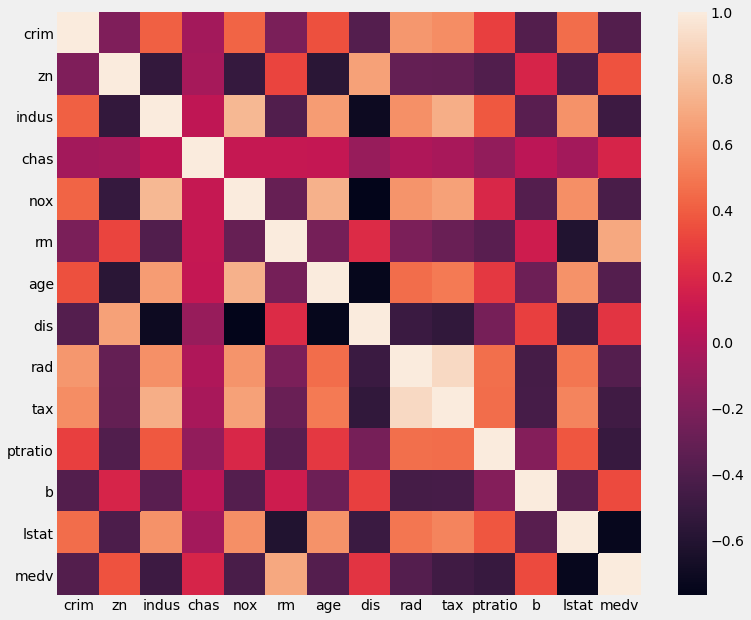

In [265]:

#Correlation matrix to look at the correlation btw the variables: 
correlation_matrix= boston_dataset.corr()
f, ax= plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix,vmax=1, square=True)



In [266]:
# Determine the independent (x) variables matrix and dependent (y) variable vector
# RM,PTRATIO,LSTAT are the top three correlated varaiables with MEDV  
X=boston_dataset.iloc[: ,[5,10,12]]
y=boston_dataset.iloc[:,13]

In [267]:
#Split the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4, random_state=1)

#Create linear regression object
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() 
#Fit multiple Linear Regression model to our Train set
regressor.fit(X_train,y_train)
# Predicting the Test set results: 
y_pred= regressor.predict(X_test)

# regression coefficients 
print('Coefficients: \n', regressor.coef_) 

# variance score: 1 means perfect prediction 
print("Variance score: {}".format(regressor.score(X_test,y_test)))



Coefficients: 
 [ 4.25811767 -0.86505435 -0.56997101]
Variance score: 0.6586830023550662


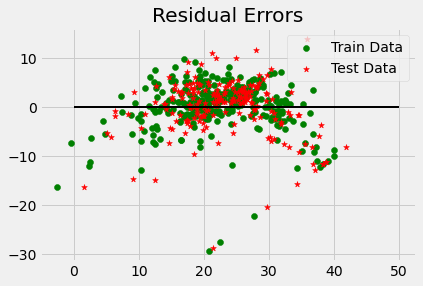

In [268]:


# plot for residual error 
## setting plot style 
plt.style.use("fivethirtyeight")
## plotting residual errors in training data 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-y_train, color="green",
            marker="o",label="Train Data")
## plotting residual errors in test data 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-y_test, color="red",
            marker="*",label="Test Data")
## plotting line for zero residual error 
plt.hlines(y=0,xmin=0, xmax=50,linewidth=2)
## plotting legend 
plt.legend(loc="upper right")
## plot title 
plt.title("Residual Errors")
## function to show plot 
plt.show()


In [169]:
y_test.mean()

23.160098522167488

(array([ 2.,  6.,  5., 28., 48., 41., 41., 16., 10.,  6.]),
 array([ 1.56817852,  5.59379162,  9.61940471, 13.64501781, 17.67063091,
        21.69624401, 25.7218571 , 29.7474702 , 33.7730833 , 37.7986964 ,
        41.82430949]),
 <a list of 10 Patch objects>)

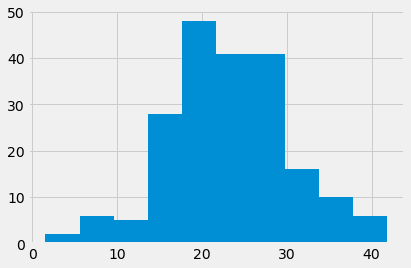

In [170]:
plt.hist(y_pred)